In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [2]:
data = pd.read_csv('spam.csv',encoding = 'ISO-8859-1')
data.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4632,ham,Oh wow thats gay. Will firmware update help,NaN,NaN,NaN
2374,ham,Dunno lei he neva say...,NaN,NaN,NaN
2809,ham,Mm so you asked me not to call radio,NaN,NaN,NaN
449,ham,10 min later k...,NaN,NaN,NaN
126,ham,"Just so that you know,yetunde hasn't sent mone...",NaN,NaN,NaN


## Total data present in data set which we are using

In [3]:
data.shape

(5572, 5)

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data CLeaning


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

## Dropping the unwanted columns from given dataset

In [7]:
data = data.drop(columns=data.columns[2:5])
# data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
data.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# data.columns = ['Category', 'Message'] 
data.rename(columns={'v1': 'Category' , 'v2': 'Message'},inplace=True)

data.sample(5)

,Category,Message
1208,ham,Also maaaan are you missing out
321,ham,Hey... Why dont we just go watch x men and hav...
2350,ham,You will be in the place of that man
2230,ham,Hey... Thk we juz go accordin to wat we discus...
748,ham,Is there a reason we've not spoken this year? ...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
data['Category']= encoder.fit_transform(data['Category']) 

data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## To check the null values and duplicate values in the given dataset

In [11]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [12]:
data.duplicated().sum()

403

## Remove duplicate value

In [13]:
data=data.drop_duplicates(keep='first')

data.duplicated().sum()



0

In [14]:
data.shape

(5169, 2)

## Check the dataset is balanced or not

In [15]:
data['Category'].value_counts()

Category
0    4516
1     653
Name: count, dtype: int64

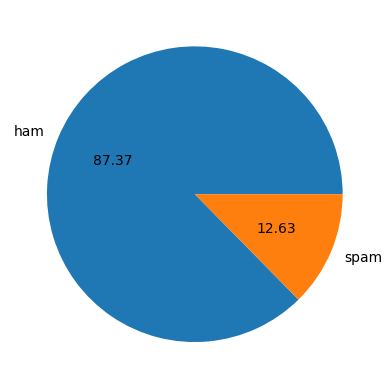

In [16]:
import matplotlib.pyplot as plt
plt.pie(data['Category'].value_counts() , labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [17]:
from matplotlib import pyplot as plt
import numpy as np


In [18]:
data['spam']= data['Category'].apply(lambda x: 1 if x=='spam' else 0)
data

,Category,Message,spam
0,0,"Go until jurong point, crazy.. Available only ...",0
1,0,Ok lar... Joking wif u oni...,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,0,U dun say so early hor... U c already then say...,0
4,0,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,0
5568,0,Will Ì_ b going to esplanade fr home?,0
5569,0,"Pity, * was in mood for that. So...any other s...",0
5570,0,The guy did some bitching but I acted like i'd...,0


## Training and testing of data 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data.Message,data.spam, test_size=0.2)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
featurer = CountVectorizer()
X_train_count = featurer.fit_transform(X_train.values)

In [21]:
X_train_count

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 54394 stored elements and shape (4135, 7618)>

## Applying the Naive Bayes Method

In [22]:
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [23]:
X_test_count = featurer.transform(X_test)
model.score(X_test_count, y_test)

1.0

In [24]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [25]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [26]:
clf.score(X_test,y_test)

1.0


## Now we design a model to detect spam and not spam messages when a user gives an unknown message.


In [27]:
# Assuming 'featurer' and 'model' are already defined and initialized
pretrained_model = model 
# Read sentences from a .txt file
with open('C:/Users/TASIR AHHAMED LASKAR/Desktop/Codesoft/SMS-Spam detaction/massege.txt', 'r') as file:
    new_sentences = file.readlines()

# Remove any leading/trailing whitespace characters (like newlines)
new_sentences = [sentence.strip() for sentence in new_sentences]

# Transform the sentences into the appropriate feature format
new_sentences_count = featurer.transform(new_sentences)

# Predict whether each sentence is spam (1) or not (0)
predictions = pretrained_model.predict(new_sentences_count)

# Output the predictions
for sentence, prediction in zip(new_sentences, predictions):
    if prediction == 1:
        print(f"'{sentence}' is a spam message.")
    else:
        print(f"'{sentence}' is not a spam message.")

'Welcome to SMS messages from Square - Reply w for more to unsubscribe from receiving messages, std rates apply' is not a spam message.
